In [5]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

log_dir = "../optrep_outputs"

# Only match exact format: "Time: <int>; ops_count: <int>"
pattern = re.compile(r"^Time: (\d+); ops_count: \d+$")

# per-second counts for all nodes
ops_per_sec = defaultdict(int)

for fname in sorted(os.listdir(log_dir)):
    if not fname.endswith(".txt"):
        continue

    with open(os.path.join(log_dir, fname)) as f:
        for line in f:
            line = line.strip()
            m = pattern.match(line)
            if m:
                t = int(m.group(1))
                if t > 60:  # ignore any timestamps beyond experiment range
                    continue
                ops_per_sec[t] += 1

# Fill missing seconds with 0
times = list(range(0, 61))  # 0 to 60 seconds
throughput = [ops_per_sec.get(t, 0) for t in times]

print(f"Min time: {min(times)}")
print(f"Max time: {max(times)}")
print(f"Length of throughput vector: {len(throughput)}")
print(f"Total ops counted: {sum(throughput)}")


Min time: 0
Max time: 60
Length of throughput vector: 61
Total ops counted: 71606


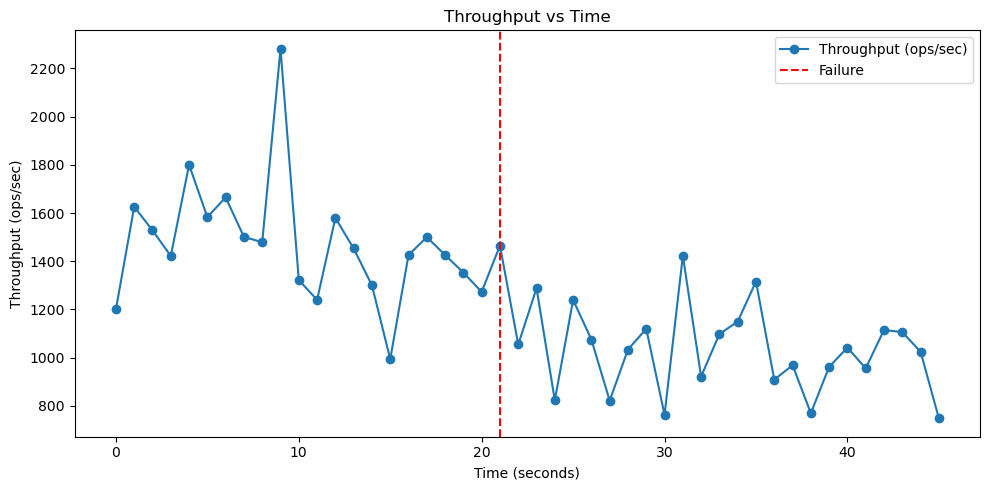

In [3]:
# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times[:46], throughput[:46],'-o', label="Throughput (ops/sec)")

plt.title("Throughput vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (ops/sec)")
plt.axvline(21, ls='--', color = 'r', label = 'Failure')
plt.legend()
plt.tight_layout()
plt.savefig('../test.png', dpi=150, bbox_inches='tight')
plt.show()

In [4]:
# import copy
# times1 = copy.deepcopy(times)
# throughput1 = copy.deepcopy(throughput)


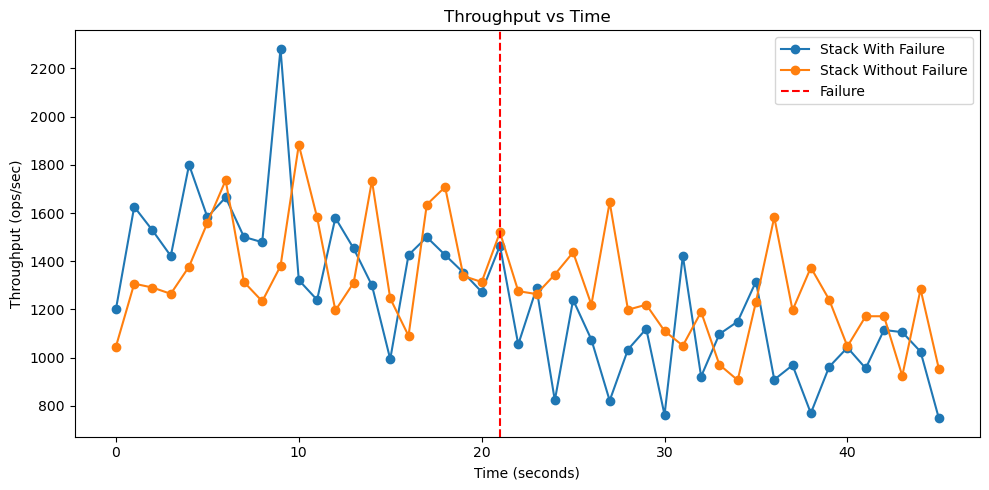

In [6]:
# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times1[:46], throughput1[:46],'-o', label="Stack With Failure")
plt.plot(times[:46], throughput[:46],'-o', label="Stack Without Failure")

plt.title("Throughput vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (ops/sec)")
plt.axvline(21, ls='--', color = 'r', label = 'Failure')
plt.legend()
plt.tight_layout()
plt.savefig('../test2.png', dpi=150, bbox_inches='tight')
plt.show()